In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# 1. Loading Data

In [2]:
df=pd.read_csv('insurance.csv')

# Top data rows

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


# Bottom Data rows

In [4]:
df.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


# Shape of DataFrame

In [5]:
df.shape

(1338, 7)

In [6]:
print('Number of row     :- ',df.shape[0])
print('Number of columns :- ',df.shape[1])

Number of row     :-  1338
Number of columns :-  7


# Other important information

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

dataframe df has no null values that menas our data is prepocessed
and I have some object type columns so to be change in numeric if 
possible

# Some statical views on dataset

In [9]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [10]:
df.describe(include='all')

,age,sex,bmi,children,smoker,region,expenses
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.665471,1.094918,NaN,NaN,13270.422414
std,14.049960,NaN,6.098382,1.205493,NaN,NaN,12110.011240
min,18.000000,NaN,16.000000,0.000000,NaN,NaN,1121.870000
25%,27.000000,NaN,26.300000,0.000000,NaN,NaN,4740.287500
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.030000
75%,51.000000,NaN,34.700000,2.000000,NaN,NaN,16639.915000


# Convert columns from objet to numeric 

In [11]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [12]:
df['sex']=df['sex'].map({'male':1,'female':0})

In [13]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [14]:
df['smoker']=df['smoker'].map({'yes':1,'no':0})

In [15]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [16]:
df['region']=df['region'].map({'southwest':1,'southeast':2,'northwest':3,'northeast':4})

In [17]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,1,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,3,21984.47
4,32,1,28.9,0,0,3,3866.86
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,3,10600.55
1334,18,0,31.9,0,0,4,2205.98
1335,18,0,36.9,0,0,2,1629.83
1336,21,0,25.8,0,0,1,2007.95


In [18]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

# input and output selection

In [19]:
x=df.drop(['expenses'],axis=1)
y=df['expenses']

In [20]:
# input for model
x.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.9,0,1,1
1,18,1,33.8,1,0,2
2,28,1,33.0,3,0,2
3,33,1,22.7,0,0,3
4,32,1,28.9,0,0,3


In [21]:
# output for model 
y.head()

0    16884.92
1     1725.55
2     4449.46
3    21984.47
4     3866.86
Name: expenses, dtype: float64

# spliting data for treaning and testing

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [24]:
x_train.head()

,age,sex,bmi,children,smoker,region
560,46,0,20.0,2,0,3
1285,47,0,24.3,0,0,4
1142,52,0,24.9,0,0,2
969,39,0,34.3,5,0,2
486,54,0,21.5,3,0,3


# Importing model

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Model Treaining

In [26]:
# linear Regression training
lr = LinearRegression()
lr.fit(x_train,y_train)

# svm 
svm = SVR()
svm.fit(x_train,y_train)

#RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

# GradientBoostingRegressor
gr = GradientBoostingRegressor()
gr.fit(x_train,y_train)

GradientBoostingRegressor()

In [44]:
y_pred_lr = lr.predict(x_test)
y_pred_svm= svm.predict(x_test)
y_pred_rf = rf.predict(x_test)
y_pred_gr = gr.predict(x_test)

In [45]:
df_pred=pd.DataFrame({'Actual':y_test,'Lr':y_pred_lr,'svm':y_pred_svm,
                    'rf':y_pred_rf,'gf':y_pred_gr})

In [46]:
df_pred

,Actual,Lr,svm,rf,gf
764,9095.07,8931.642854,9548.273266,11920.2849,11124.290442
887,5272.18,7108.658375,9492.505366,5311.7563,5849.725392
890,29330.98,36911.245886,9648.766753,28462.1019,27971.805338
1293,9301.89,9492.186731,9555.013641,10551.9157,9818.573769
259,33750.29,27005.514588,9420.413342,34391.3542,34027.954616
...,...,...,...,...,...
109,47055.53,39118.983220,9648.900738,47145.0511,45440.971791
575,12222.90,11822.870656,9625.450474,12088.9706,12800.964047
535,6067.13,7628.837051,9504.157290,6357.3079,6863.005649
543,63770.43,40956.397727,9605.016723,46692.4108,47951.920861


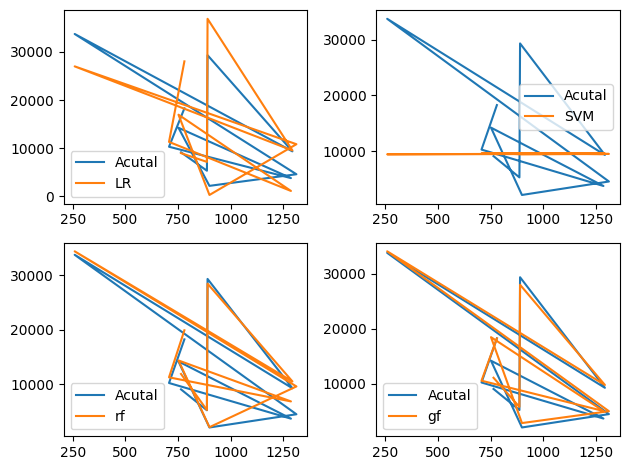

In [47]:
plt.subplot(221)
plt.plot(df_pred['Actual'].iloc[:11],label='Acutal')
plt.plot(df_pred['Lr'].iloc[:11],label="LR")
plt.legend()

plt.subplot(222)
plt.plot(df_pred['Actual'].iloc[:11],label='Acutal')
plt.plot(df_pred['svm'].iloc[:11],label="SVM")
plt.legend()


plt.subplot(223)
plt.plot(df_pred['Actual'].iloc[:11],label='Acutal')
plt.plot(df_pred['rf'].iloc[:11],label="rf")
plt.legend()

plt.subplot(224)
plt.plot(df_pred['Actual'].iloc[:11],label='Acutal')
plt.plot(df_pred['gf'].iloc[:11],label="gf")
plt.legend()
plt.tight_layout()# this remove possible overlap of legend and graph
plt.show()

# Evaluating the model for best prediction

In [48]:
from sklearn import metrics


In [49]:
score_lr  = metrics.r2_score(y_test,y_pred_lr)
score_svm = metrics.r2_score(y_test,y_pred_svm)
score_rf  = metrics.r2_score(y_test,y_pred_rf)
score_gf  = metrics.r2_score(y_test,y_pred_gr)
print(score_lr,score_svm,score_rf,score_gf)

0.7833214205203847 -0.07229746602305465 0.8597038405104234 0.8753152110368728


In [50]:
cost_lr = metrics.mean_absolute_error(y_test,y_pred_lr)
cost_svm= metrics.mean_absolute_error(y_test,y_pred_svm)
cost_rf = metrics.mean_absolute_error(y_test,y_pred_rf)
cost_gf = metrics.mean_absolute_error(y_test,y_pred_gr)
print(cost_lr,cost_svm,cost_rf,cost_gf)

4186.940106317013 8592.429900208082 2543.84480990405 2504.7062922243013


In [51]:
# here we show that the r_squire score_gf is more than other and cost_gf
# is less then other mean_absolute_error that menas best model is gr = GradientBoostingRegressor()


In [ ]:

gr = GradientBoostingRegressor()
gr.fit(x_train,y_train)

# predict charges for new customer

In [52]:
data={
    'age':40,
    'sex':1,
    'bmi':40.30,
    'children':4,
    'smoker':1,
    'region':2
}
df_new=pd.DataFrame(data,index=[0])

In [53]:
df_new

,age,sex,bmi,children,smoker,region
0,40,1,40.3,4,1,2


In [55]:
prediction = gr.predict(df_new)

In [56]:
prediction

array([42877.64831755])

In [61]:


data={
    'age':int(input('age in year')),
    'sex':int(input('male : 1, female: 0')),
    'bmi':float(input('enter floating bmi value')),
    'children':int(input('enter how many child cover insurance')),
    'smoker':int(input('yes:1, no:0')),
    'region':int(input('sw:1,se:2,nw:3,ne:4'))
}
df_n=pd.DataFrame(data,index=[0])
prediction=gr.predict(df_n)
print(prediction)

age in year40
male : 1, female: 01
enter floating bmi value40.30
enter how many child cover insurance4
yes:1, no:01
sw:1,se:2,nw:3,ne:42
[42877.64831755]


# Now we perfactly make modle by joblib

In [62]:
import joblib

In [63]:
joblib.dump(gr,'Model_joblib_gr')

['Model_joblib_gr']

In [64]:
model=joblib.load('Model_joblib_gr')

In [65]:
model.predict(df_new)

array([42877.64831755])